# World Happiness Analysis

The Happy Planet Index (HPI) is an index of human well-being and environmental impact introduced by the New Economics Foundation in July 2006. The Happy Planet Index measures what matters: sustainable wellbeing for all. It tells us how well nations are doing at achieving long, happy, sustainable lives. 156 countries are ranked based on how happy their citizens perceive themselves to be.

Column Information:
- Score is a populated-weighted average score on a scale running from 0 to 10 that is tracked over time and compared against other countries.
- GDP per capita is in terms of Purchasing Power Parity (PPP) adjusted to constant 2011 international dollars, taken from the World Development Indicators (WDI) released by the World Bank on November 14, 2018.
- The healthy life expectancy at birth are based on data from the World Health Organization (WHO) Global Health Observatory data repository.
- Social support is the national average of the binary responses (either 0 or 1) to question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”
- Freedom to make life choices is the national average of binary responses to the question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”
- Generosity is the residual of regressing the national average to the question “Have you donated money to a charity in the past month?” on GDP per capita.
- Perceptions of corruption are the average of binary answers to two questions: “Is corruption widespread throughout the government or not?” and “Is corruption widespread within businesses or not?”

## Data Preparation and Cleaning

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df2019 = pd.read_csv('./2019.csv')

In [45]:
df2019

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [46]:
countries = df2019.shape[0]
print('There are {} countries in the dataset'.format(countries))

There are 156 countries in the dataset


In [47]:
df2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [48]:
df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


## Exploratory Analysis and Visualization

In [51]:
df2019.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


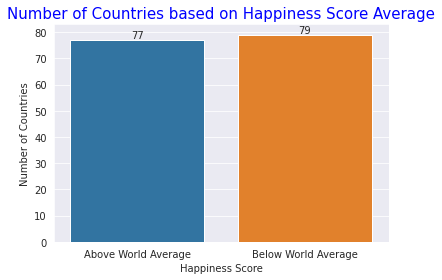

In [52]:
above_mean_score =['Above World Average' if i >= df2019.mean()['Score'] else 'Below World Average' \
                   for i in df2019.Score]
df = pd.DataFrame({'Happiness_Score' : above_mean_score})
ax = sns.countplot(x = df.Happiness_Score)
for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate(int(y), (x.mean(), y), ha='center', va='bottom')
plt.xlabel('Happiness Score')
plt.ylabel('Number of Countries')
plt.title('Number of Countries based on Happiness Score Average', color = 'blue', fontsize = 15)
plt.show()

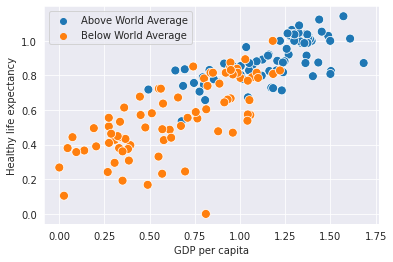

In [53]:
# Relationship between GDP per capita and healthy life expectancy

df2019['GDP per capita']
sns.scatterplot(df2019['GDP per capita'], df2019['Healthy life expectancy'], hue=above_mean_score, s=80);

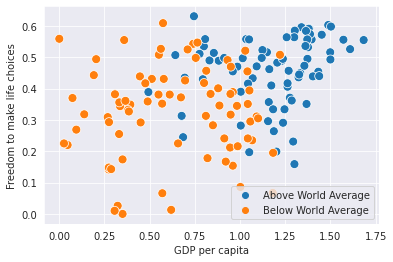

In [54]:
# Relationship between GDP per capita and freedom to make life choices

df2019['GDP per capita']
sns.scatterplot(df2019['GDP per capita'], df2019['Freedom to make life choices'], hue=above_mean_score, s=80);

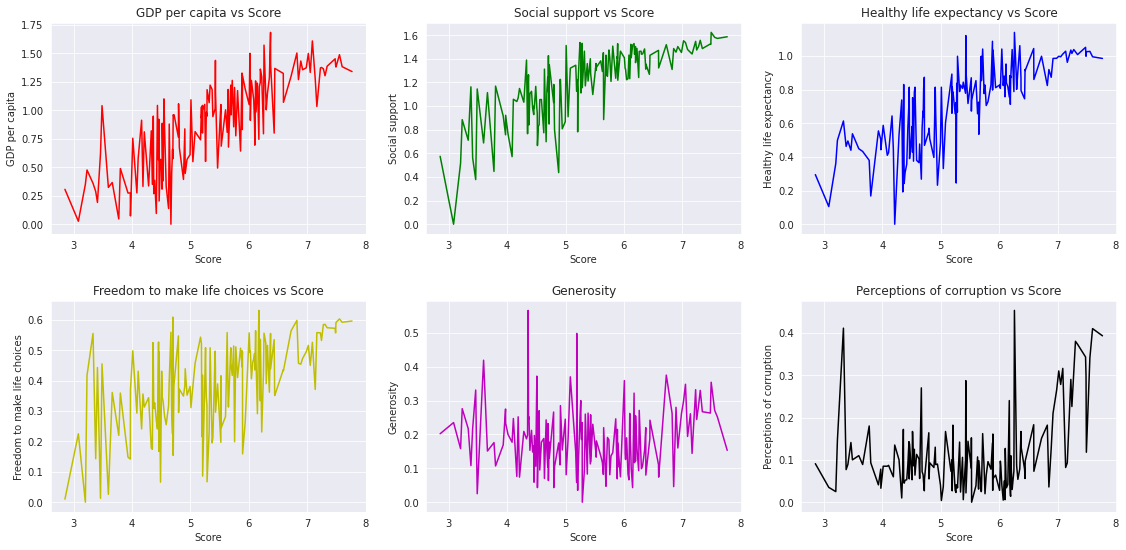

In [55]:
# Relationship between GDP per capita and freedom to make life choices

sns.set_style("darkgrid")
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

axes[0, 0].plot(df2019.Score, df2019['GDP per capita'], 'r')
axes[0, 0].set_xlabel('Score')
axes[0, 0].set_ylabel('GDP per capita')
axes[0, 0].set_title('GDP per capita vs Score')

axes[0, 1].plot(df2019.Score, df2019['Social support'], 'g')
axes[0, 1].set_xlabel('Score')
axes[0, 1].set_ylabel('Social support')
axes[0, 1].set_title('Social support vs Score')

axes[0, 2].plot(df2019.Score, df2019['Healthy life expectancy'], 'b')
axes[0, 2].set_xlabel('Score')
axes[0, 2].set_ylabel('Healthy life expectancy')
axes[0, 2].set_title('Healthy life expectancy vs Score')

axes[1, 0].plot(df2019.Score, df2019['Freedom to make life choices'], 'y')
axes[1, 0].set_xlabel('Score')
axes[1, 0].set_ylabel('Freedom to make life choices')
axes[1, 0].set_title('Freedom to make life choices vs Score')

axes[1, 1].plot(df2019.Score, df2019['Generosity'], 'm')
axes[1, 1].set_xlabel('Score')
axes[1, 1].set_ylabel('Generosity')
axes[1, 1].set_title('Generosity')

axes[1, 2].plot(df2019.Score, df2019['Perceptions of corruption'], 'k')
axes[1, 2].set_xlabel('Score')
axes[1, 2].set_ylabel('Perceptions of corruption')
axes[1, 2].set_title('Perceptions of corruption vs Score')

plt.tight_layout(pad=2)
plt.show()

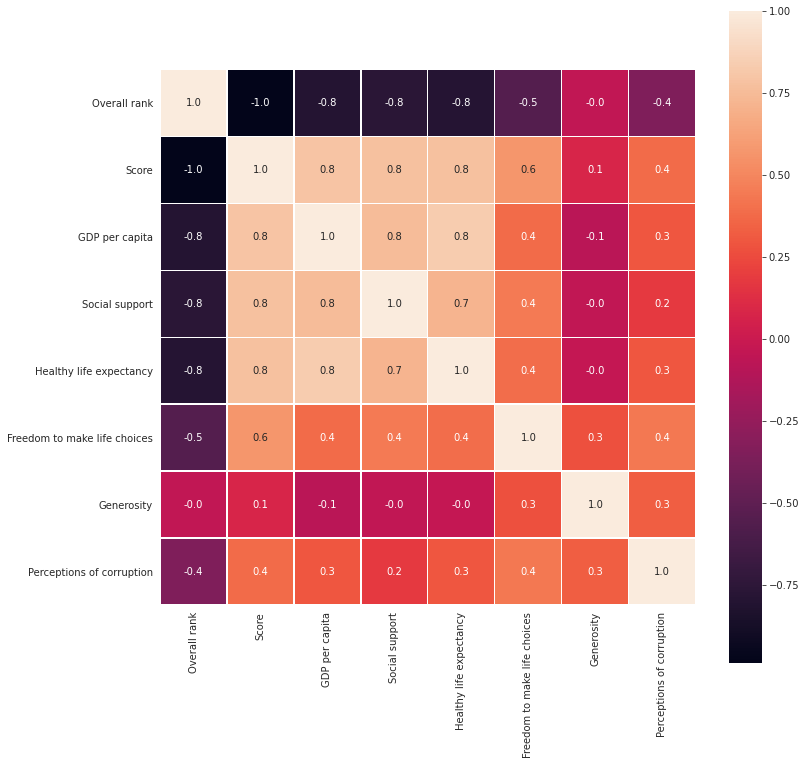

In [56]:
# Correlation between variables

f,ax = plt.subplots(figsize = (12, 12))
sns.heatmap(df2019.corr(), annot = True, linewidths = 0.1, fmt = '.1f', ax = ax, square = True);

## Asking and Answering Questions

In [59]:
# Which 5 countries have the top score?

df = df2019.sort_values(by=['Score'], ascending=False)
df.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [60]:
print('The 5 countries with the top score are: {}'.format(', '.join(df['Country or region'].head(5))))

The 5 countries with the top score are: Finland, Denmark, Norway, Iceland, Netherlands


In [61]:
# Which 5 countries have the top GDP per capita?

df = df2019.sort_values(by=['GDP per capita'], ascending=False)
df.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
28,29,Qatar,6.374,1.684,1.313,0.871,0.555,0.220,0.167
13,14,Luxembourg,7.090,1.609,1.479,1.012,0.526,0.194,0.316
33,34,Singapore,6.262,1.572,1.463,1.141,0.556,0.271,0.453
20,21,United Arab Emirates,6.825,1.503,1.310,0.825,0.598,0.262,0.182
50,51,Kuwait,6.021,1.500,1.319,0.808,0.493,0.142,0.097


In [62]:
print('The 5 countries with the top GDP per capita are: {}'.format(', '.join(df['Country or region'].head(5))))

The 5 countries with the top GDP per capita are: Qatar, Luxembourg, Singapore, United Arab Emirates, Kuwait


In [63]:
# Which 5 countries have the top social support?

df = df2019.sort_values(by=['Social support'], ascending=False)
df.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380


In [64]:
print('The 5 countries with the top social support are: {}'.format(', '.join(df['Country or region'].head(5))))

The 5 countries with the top social support are: Iceland, Finland, Norway, Denmark, New Zealand


In [65]:
# Which 5 countries have the top healthy life expectancy?

df = df2019.sort_values(by=['Healthy life expectancy'], ascending=False)
df.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
33,34,Singapore,6.262,1.572,1.463,1.141,0.556,0.271,0.453
75,76,Hong Kong,5.430,1.438,1.277,1.122,0.440,0.258,0.287
57,58,Japan,5.886,1.327,1.419,1.088,0.445,0.069,0.140
29,30,Spain,6.354,1.286,1.484,1.062,0.362,0.153,0.079
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343


In [66]:
print('The 5 countries with the top healthy life expectancy are: {}'.format(', '.join(df['Country or region'].head(5))))

The 5 countries with the top healthy life expectancy are: Singapore, Hong Kong, Japan, Spain, Switzerland


In [67]:
# Which 5 countries have the top freedom to make life choices?

df = df2019.sort_values(by=['Freedom to make life choices'], ascending=False)
df.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
40,41,Uzbekistan,6.174,0.745,1.529,0.756,0.631,0.322,0.240
108,109,Cambodia,4.700,0.574,1.122,0.637,0.609,0.232,0.062
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
20,21,United Arab Emirates,6.825,1.503,1.310,0.825,0.598,0.262,0.182
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393


In [68]:
print('The 5 countries with the top freedom to make life choices are: {}'.format(', '.join(df['Country or region'].head(5))))

The 5 countries with the top freedom to make life choices are: Uzbekistan, Cambodia, Norway, United Arab Emirates, Finland


In [69]:
# Which 5 countries have the top generosity?

df = df2019.sort_values(by=['Generosity'], ascending=False)
df.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
130,131,Myanmar,4.360,0.710,1.181,0.555,0.525,0.566,0.172
91,92,Indonesia,5.192,0.931,1.203,0.660,0.491,0.498,0.028
146,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110
21,22,Malta,6.726,1.300,1.520,0.999,0.564,0.375,0.151
120,121,Kenya,4.509,0.512,0.983,0.581,0.431,0.372,0.053


In [70]:
print('The 5 countries with the top generosity are: {}'.format(', '.join(df['Country or region'].head(5))))

The 5 countries with the top generosity are: Myanmar, Indonesia, Haiti, Malta, Kenya


In [71]:
# Which 5 countries have the top perceptions of corruption?

df = df2019.sort_values(by=['Perceptions of corruption'], ascending=False)
df.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
33,34,Singapore,6.262,1.572,1.463,1.141,0.556,0.271,0.453
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380


In [72]:
print('The 5 countries with the top perceptions of corruption are: {}'.format(', '.join(df['Country or region'].head(5))))

The 5 countries with the top perceptions of corruption are: Singapore, Rwanda, Denmark, Finland, New Zealand


## Inferences and Conclusion

The 2019 world happiness report features the happiness score averaged over the years 2016–2018. As per the 2019 Happiness Index, Finland is the happiest country in the world. Denmark, Norway, Iceland and Netherlands hold the next top positions.

The charts shown above implies that most developed countries have a higher happiness score compared to others, aside from a higher GDP, social support, life expectancy and freedom. The only 2 variables without a direct correlation with the score is the generosity and perceptions of corruption variables, although only a handful of countries with a high happiness score have a spike in the perception of corruption, such as Singapore.

Some might argue that the ranking results are counterintuitive when it come to certain dimensions, such as measuring unhappiness using the number of suicides. Some of the countries which are ranked among the top happiest countries in the world will also feature among the top with the highest suicide rates in the world.

There are no hard and fast indicators to determine happiness, thus it is advisable to take the report with a pinch of salt. Nevertheless, the world happiness report still has its usefulness.